In [9]:
import os
import sys
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), 'src')))

from models.model_factory import ModelFactory

In [12]:
mf = ModelFactory()
images = mf.get_model('cnn')
audio = mf.get_model('audio_rnn')
multimodal = mf.get_model('multimodal')

In [2]:
def load_history(model_name, history_dir='src/models/history'):
    history_path = os.path.join(history_dir, f'{model_name}_history.pickle')
    with open(history_path, 'rb') as f:
        history = pickle.load(f)
    return history

In [3]:
def plot_history(history, model_name):
    acc = history.get('accuracy')
    val_acc = history.get('val_accuracy')
    loss = history.get('loss')
    val_loss = history.get('val_loss')
    
    epochs_range = range(1, len(acc) + 1)

    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Train Accuracy')
    if val_acc: plt.plot(epochs_range, val_acc, label='Val Accuracy')
    plt.legend(loc='lower right')
    plt.title(f'{model_name.capitalize()} - Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Train Loss')
    if val_loss: plt.plot(epochs_range, val_loss, label='Val Loss')
    plt.legend(loc='upper right')
    plt.title(f'{model_name.capitalize()} - Loss')

    plt.show()

In [4]:
def evaluate_model(model, X_test, y_test, model_name, label_encoder=None):
    y_pred_probs = model.predict(X_test)
    y_pred = np.argmax(y_pred_probs, axis=1)

    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    print(f"\n{model_name} Model Stats:")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1 Score:  {f1:.4f}\n")

    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_ if label_encoder else None))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=label_encoder.classes_ if label_encoder else None,
                yticklabels=label_encoder.classes_ if label_encoder else None)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'{model_name.capitalize()} - Confusion Matrix')
    plt.show()


In [5]:
audio_model_path = 'src/models/saved/model_audio.keras'
image_model_path = 'src/models/saved/model_images.keras'
multimodal_model_path = 'src/models/saved/model_multimodal.keras'

audio_model = load_model(audio_model_path)
image_model = load_model(image_model_path)
multimodal_model = load_model(multimodal_model_path)

audio_history = load_history('audio')
image_history = load_history('images')
multimodal_history = load_history('multimodal')

C:\Users\milos\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 38 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
C:\Users\milos\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 42 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


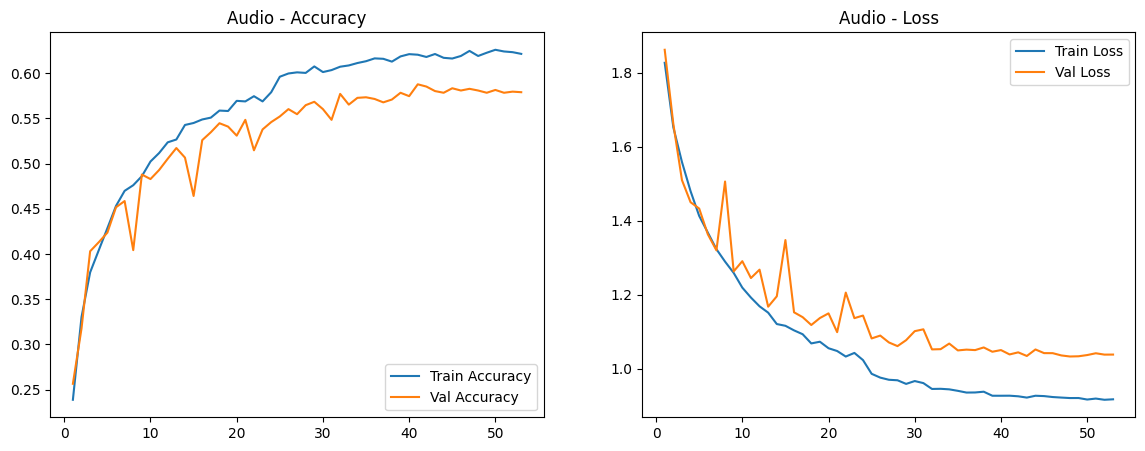

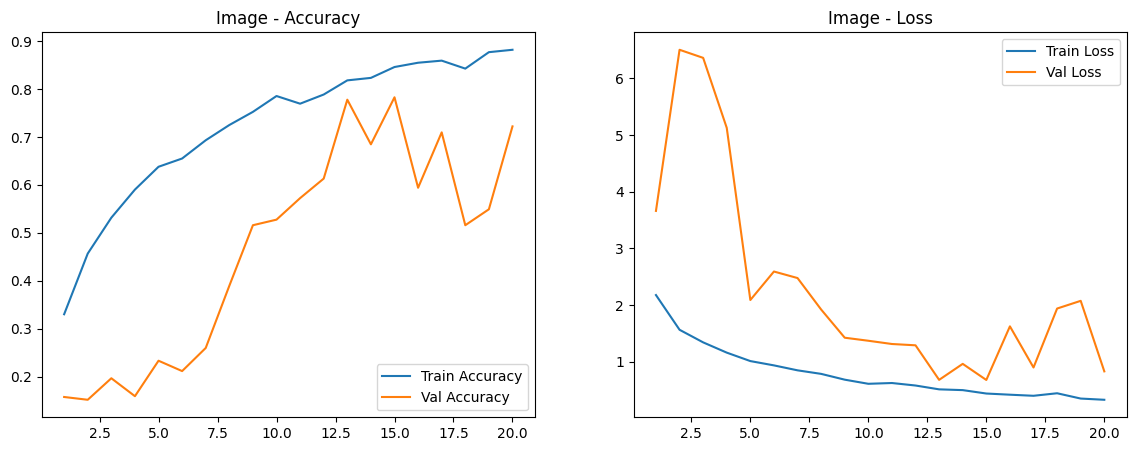

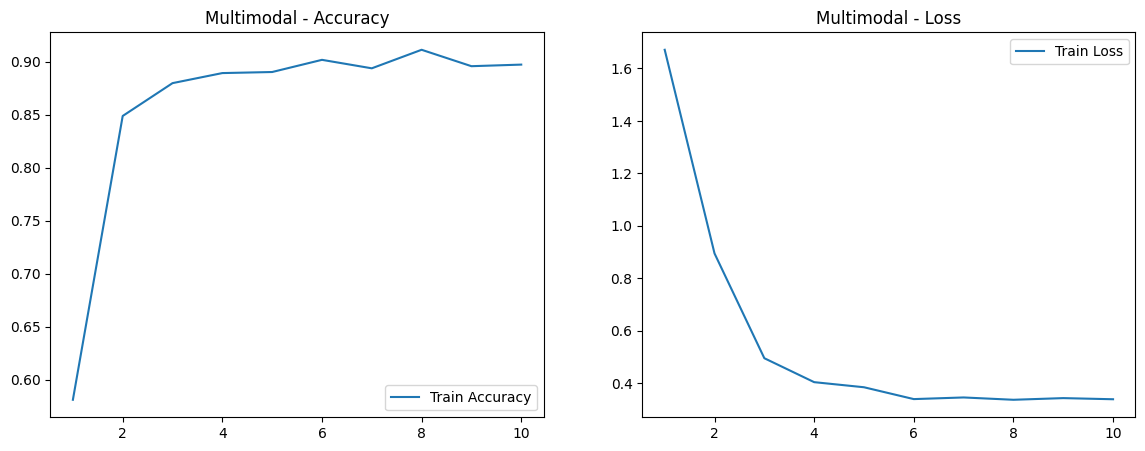

In [6]:
plot_history(audio_history, 'audio')
plot_history(image_history, 'image')
plot_history(multimodal_history, 'multimodal')

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step

audio Model Stats:
Accuracy:  0.5416
Precision: 0.6067
Recall:    0.5416
F1 Score:  0.5355

              precision    recall  f1-score   support

       angry       0.89      0.44      0.59        75
     disgust       0.52      0.76      0.62        71
        fear       0.74      0.45      0.56        69
       happy       0.57      0.31      0.40        80
     neutral       0.73      0.40      0.52        40
         sad       0.44      0.59      0.51        79
   surprised       0.45      0.77      0.56        79

    accuracy                           0.54       493
   macro avg       0.62      0.53      0.54       493
weighted avg       0.61      0.54      0.54       493



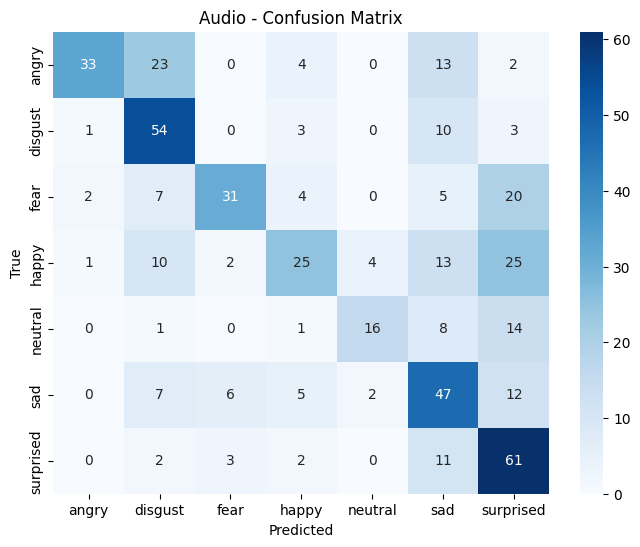

47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step

image Model Stats:
Accuracy:  0.7600
Precision: 0.7872
Recall:    0.7600
F1 Score:  0.7478

              precision    recall  f1-score   support

       angry       1.00      0.40      0.57       225
     disgust       0.71      0.93      0.81       213
        fear       0.75      0.73      0.74       207
       happy       0.87      0.96      0.91       240
     neutral       0.77      0.88      0.82       120
         sad       0.65      0.85      0.74       237
   surprised       0.75      0.61      0.67       237

    accuracy                           0.76      1479
   macro avg       0.79      0.77      0.75      1479
weighted avg       0.79      0.76      0.75      1479



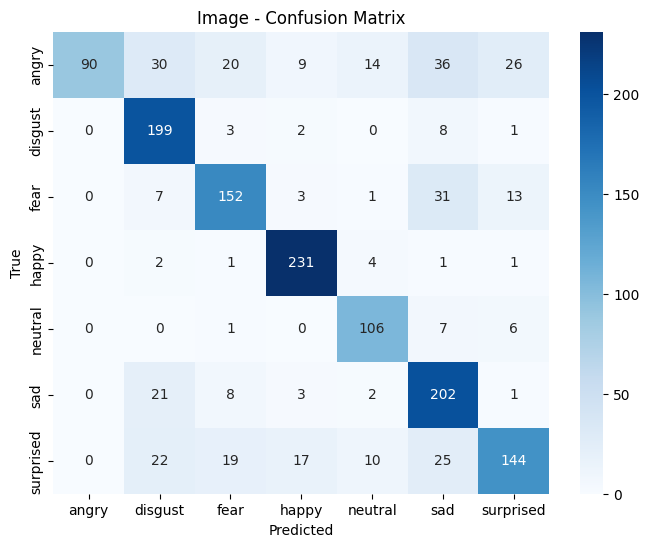

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step

multimodal Model Stats:
Accuracy:  0.8600
Precision: 0.8660
Recall:    0.8600
F1 Score:  0.8594

              precision    recall  f1-score   support

       angry       0.95      0.75      0.84        75
     disgust       0.77      0.94      0.85        71
        fear       0.87      0.78      0.82        69
       happy       0.92      0.96      0.94        80
     neutral       0.90      0.93      0.91        40
         sad       0.78      0.81      0.80        79
   surprised       0.88      0.87      0.88        79

    accuracy                           0.86       493
   macro avg       0.87      0.86      0.86       493
weighted avg       0.87      0.86      0.86       493



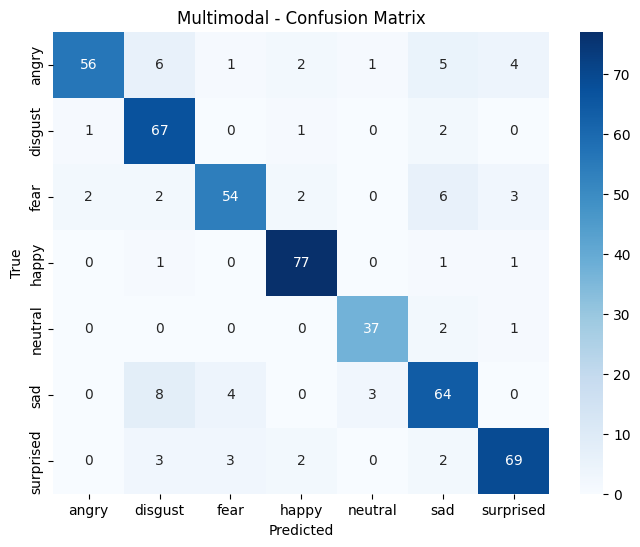

In [14]:
evaluate_model(audio_model, audio.X_test, audio.y_test, 'audio', audio.label_encoder)
evaluate_model(image_model, images.X_test, images.y_test, 'image', images.label_encoder)
evaluate_model(multimodal_model, [multimodal.X_images_test, multimodal.X_audio_test], multimodal.y_test, 'multimodal', multimodal.label_encoder)